In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
im = cv2.imread(r'/Users/jooyong/github_locals/computer_vision/hw1/cameraman.tif', 0)

In [3]:
# float format image
print(im)
print(type(im))
print(im.shape)

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]
<class 'numpy.ndarray'>
(256, 256)


In [4]:
# normalize float format image
im_norm = (im-np.min(im))/(np.max(im)-np.min(im))
print(im_norm)
print(im_norm.shape)

[[0.60569106 0.61788618 0.61382114 ... 0.58536585 0.58943089 0.58943089]
 [0.62195122 0.59756098 0.6097561  ... 0.59756098 0.60162602 0.59349593]
 [0.60569106 0.61788618 0.61382114 ... 0.58536585 0.58943089 0.58943089]
 ...
 [0.43495935 0.50813008 0.47154472 ... 0.5203252  0.52845528 0.43495935]
 [0.46341463 0.48373984 0.5        ... 0.51219512 0.5        0.43089431]
 [0.46341463 0.48373984 0.5        ... 0.51219512 0.5        0.43089431]]
(256, 256)


In [5]:
length = im.shape[0]
width = im.shape[1]

In [6]:
# zero padding
pads = np.zeros((length+2, width+2))
pads[1:length+1,1:width+1] = im_norm
padded_im = pads

In [7]:
print(padded_im)
print(padded_im.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.60569106 0.61788618 ... 0.58943089 0.58943089 0.        ]
 [0.         0.62195122 0.59756098 ... 0.60162602 0.59349593 0.        ]
 ...
 [0.         0.46341463 0.48373984 ... 0.5        0.43089431 0.        ]
 [0.         0.46341463 0.48373984 ... 0.5        0.43089431 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(258, 258)


In [8]:
diff_along_y = im_norm.copy()

for row in range(256):
    for column in range(256):
        three_by_three = padded_im[row:row+3, column:column+3]
        current_p = three_by_three[1, 1]
        next_p = three_by_three[2, 1]

        change = abs(next_p - current_p)

        diff_along_y[row, column] = change

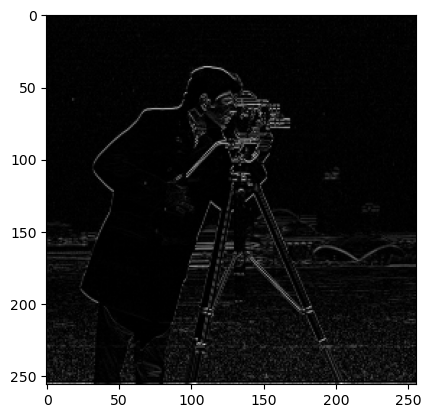

In [9]:
plt.imshow(diff_along_y, cmap='gray')

In [10]:
diff_along_x = im_norm.copy()

for row in range(256):
    for column in range(256):
        three_by_three = padded_im[row:row+3, column:column+3]
        current_p = three_by_three[1, 1]
        next_p = three_by_three[1, 2]

        change = abs(next_p - current_p)

        diff_along_x[row, column] = change

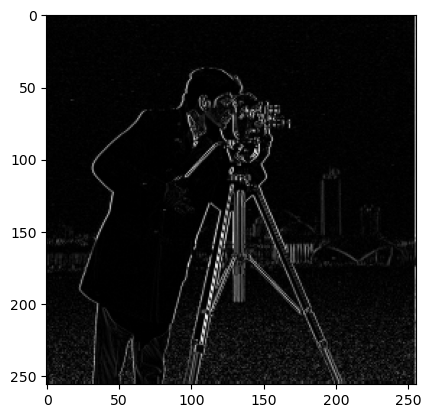

In [11]:
plt.imshow(diff_along_x, cmap='gray')

In [21]:
grad_mag = (diff_along_x**2+diff_along_y**2)**(1/2)
grad_angle = np.arctan((diff_along_y/(diff_along_x+0.0000001)))

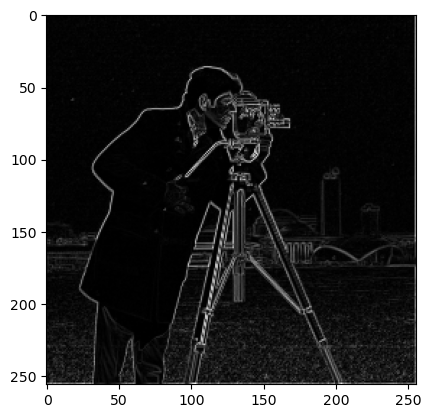

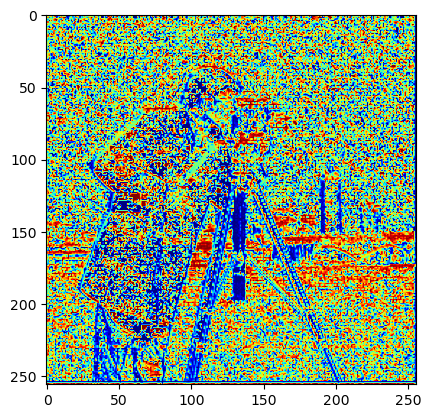

In [24]:
plt.imshow(grad_mag, cmap='gray')
plt.show()
plt.imshow(grad_angle, cmap='jet')
plt.show()